In [48]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

**Diskretna Fourierova transformacija (DFT)** nam nudi matematično orodje za dekompozicijo originalnega signala na sinusoide.

Zanima nas torej s katerimi sinusi in kosinusi lahko predstavimo signal. 

Signal razstavljamo na sinusoide, saj sinus pri prehodu skozi sistem ne spremeni svoje frekvence temveč le amplitudo in fazo (zamik). Tako dobimo idealno orodje za opazovanje dogajanja pri posamezni frekvenci.

Poudarimo, da je pri DFT signal diskreten in neskončen! V računalništvu neskončen signal ne obstaja, zato predpostavimo, da je signal periodičen in da imamo v pomnilniku le eno celo periodo.

Frekvenca sinusa pove, koliko nihajev opravi v sekundi. Pri DFT signal razstavljamo na sinusoide s točno določeno frekvenco. Tem sinusoidam pravimo tudi bazne funkcije. 

#### Primer 1

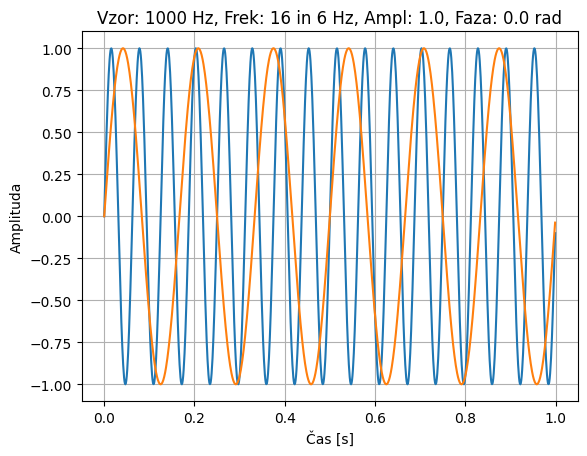

Skalarni produkt: 0.0


In [51]:
# Generiranje baznih funkcij
Fs = 1000                       # vzorčevalna frekvenca [Hz] - število "točk" na sekundo
T = 1.0                         # dolžina vzorcev - signala [s]
t = np.arange(0, T, (1.0 / Fs)) # točke vzorčenja - časovni vektor
freq1 = 16                      # frekvenca 1 [Hz]
freq2 = 6                       # frekvenca 2 [Hz]
A = 1.0                         # amplituda
p = 0.0                         # faza [rad]

# Frekvenca mora biti obvezno celo število med [0, Fs/2]

y1 = A*np.sin(2*np.pi*freq1*t+p)
y2 = A*np.sin(2*np.pi*freq2*t+p)

# Izris
plt.plot(t, y1)
plt.plot(t, y2)
plt.title(f'Vzor: {Fs} Hz, Frek: {freq1} in {freq2} Hz, Ampl: {A}, Faza: {p} rad')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# Bazne funkcije so med seboj ortogonalne (pravokotne).
# To pomeni, da je skalarni produktov dveh baznih funkcij z različno frekvenco enaka 0.

# Skalarni produkt - dot(y1, y2)
scal_prod = round(np.dot(y1, y2), 2)
print(f"Skalarni produkt: {scal_prod}")

# Pozor! Funkcije so ortogonalne le, v kolikor je k1 oz. k2 celo število.

#### Primer 2

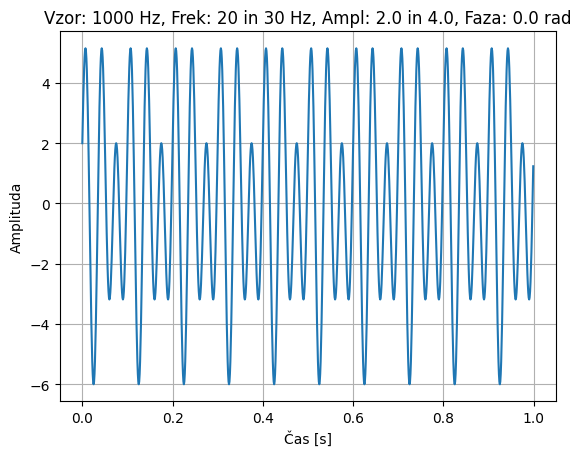

In [52]:
# Kako dobimo frekvenčno vsebino?
Fs = 1000                       # vzorčevalna frekvenca [Hz] - število "točk" na sekundo
T = 1.0                         # dolžina vzorcev - signala [s]
t = np.arange(0, T, (1.0 / Fs)) # točke vzorčenja - časovni vektor
freq1 = 20                      # frekvenca 1 [Hz]
freq2 = 30                      # frekvenca 2 [Hz]
A1 = 2.0                        # amplituda 1
A2 = 4.0                        # amplituda 2
p = 0.0                         # faza [rad]

y1 = A1*np.cos(2*np.pi*freq1*t+p)
y2 = A2*np.sin(2*np.pi*freq2*t+p)

# Sestavljen signal
ys = y1 + y2

# Izris
plt.plot(t, ys)
plt.title(f'Vzor: {Fs} Hz, Frek: {freq1} in {freq2} Hz, Ampl: {A1} in {A2}, Faza: {p} rad')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

In [53]:
# Ob predpostavki, da je signal mogoče razstaviti na posamezne sinusoide, lahko sklepamo naslednje:
 
# Če s skalarnim produktom pomnožimo poljuben signal z bazno funkcijo, 
# dobimo zaradi ortogonalnosti rezultat 0, v kolikor bazna funkcija v # signalu ni prisotna.

# V kolikor pa je dobljena vrednost različna od 0, je bazna funkcija zagotovo prisotna v signalu 
# (ob predpostavki, da je Nyqustov teorem izpolnjen), njeno (nenormalizirano) amplitudo pa predstavlja ravno vrednost skalarnega produkta.

# Skalarni produkt med baznima signaloma base_cos (cos) in base_sin (sin) s frekvenco 20 Hz in sestavljenim signalom ys (iz prejšnje celice)
Fs = 1000                       # vzorčevalna frekvenca [Hz] - število "točk" na sekundo
T = 1.0                         # dolžina vzorcev - signala [s]
t = np.arange(0, T, (1.0 / Fs)) # točke vzorčenja - časovni vektor
freq = 20                       # frekvenca [Hz]
A = 1.0                         # amplituda
p = 0.0                         # faza [rad]

base_cos = A*np.cos(2*np.pi*freq*t+p)
base_sin = A*np.sin(2*np.pi*freq*t+p)

print(f"cos ({freq} Hz): {round(np.dot(ys, base_cos), 2)}")
print(f"sin ({freq} Hz): {round(np.dot(ys, base_sin), 2)}")

# Skalarni produkt med baznima signaloma base_cos (cos) in base_sin (sin) s frekvenco 30 Hz in sestavljenim signalom ys (iz prejšnje celice)
Fs = 1000                       # vzorčevalna frekvenca [Hz] - število "točk" na sekundo
T = 1.0                         # dolžina vzorcev - signala [s]
t = np.arange(0, T, (1.0 / Fs)) # točke vzorčenja - časovni vektor
freq = 30                       # frekvenca [Hz]
A = 1.0                         # amplituda
p = 0.0                         # faza [rad]

base_cos = A*np.cos(2*np.pi*freq*t+p)
base_sin = A*np.sin(2*np.pi*freq*t+p)

print(f"cos ({freq} Hz): {round(np.dot(ys, base_cos), 2)}")
print(f"sin ({freq} Hz): {round(np.dot(ys, base_sin), 2)}")

cos (20 Hz): 1000.0
sin (20 Hz): -0.0
cos (30 Hz): 0.0
sin (30 Hz): 2000.0


#### Primer 3

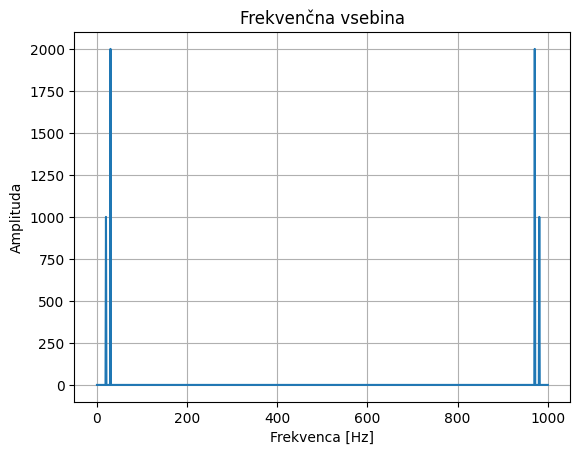

coef_20: 1000.0
coef_30: 2000.0


In [55]:
# Kaj sploh dela DFT? Primerjajmo spodnje rezultate s zgornjimi izračuni
Ys = np.fft.fft(ys)

# Frekvenčni razdelki za risanje X osi
N = len(t)
x = np.linspace(0, Fs, N)

# Izris
plt.plot(x, abs(Ys))
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# Izberimo koeficiente na mestih 20 in 30
print(f"coef_20: {round(abs(Ys[20]), 2)}")
print(f"coef_30: {round(abs(Ys[30]), 2)}")

#### Primer 4

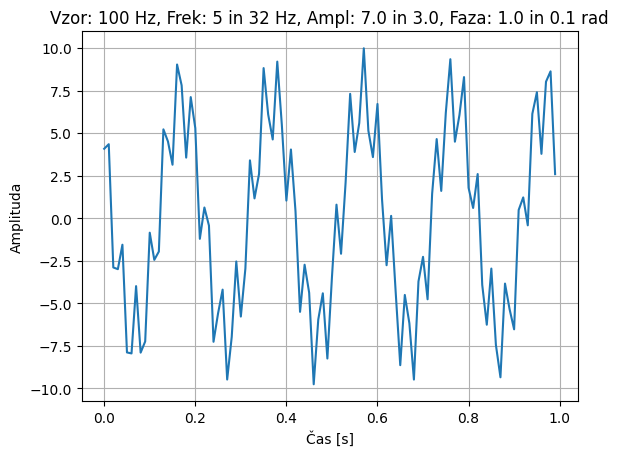

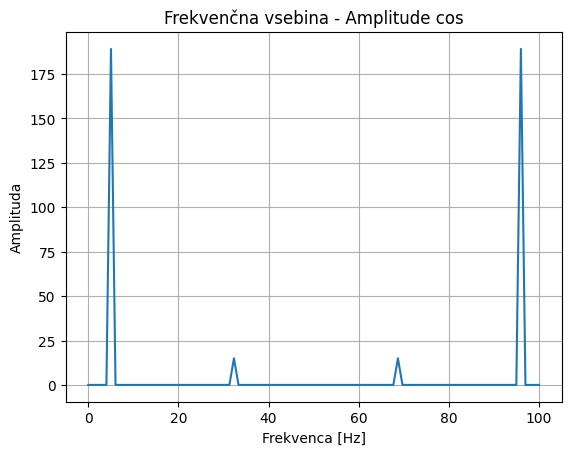

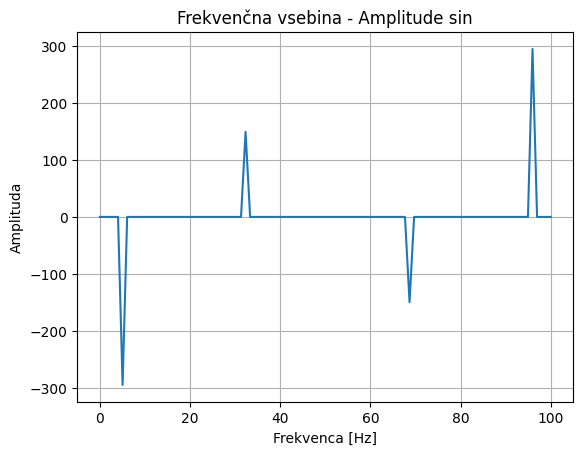

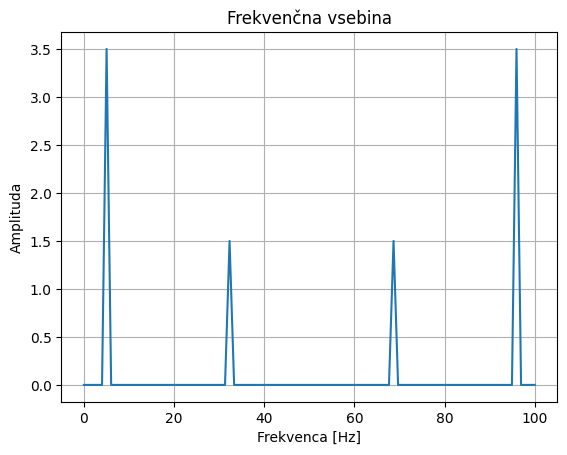

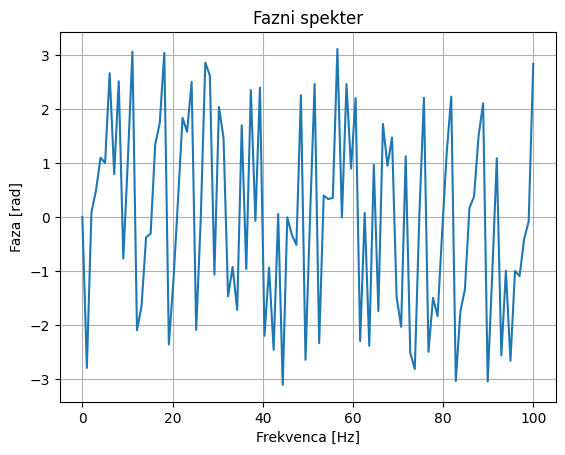

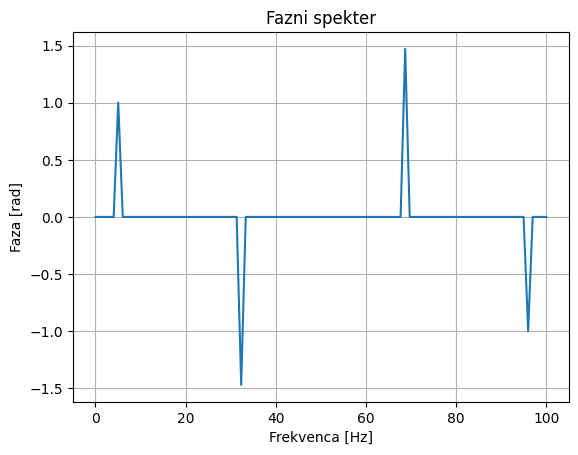

p1 s cos: 57.3, fft p1: 57.3
p2 s sin: 5.73, fft p2: -84.27


In [56]:
# Frekvenčna domena - Nosi informacijo o magnitudi in fazi posamičnih frekvenc
# Koeficienti? Kako si razlagamo koeficiente, ki jih vrača FFT?
Fs = 100                        # vzorčevalna frekvenca [Hz] - število "točk" na sekundo
T = 1.0                         # dolžina vzorcev - signala [s]
t = np.arange(0, T, (1.0 / Fs)) # točke vzorčenja - časovni vektor
freq1 = 5                       # frekvenca 1 [Hz]
freq2 = 32                      # frekvenca 2 [Hz]
A1 = 7.0                        # amplituda 1
A2 = 3.0                        # amplituda 2
p1 = 1.0                        # faza 1 [rad]
p2 = 0.1                        # faza 2 [rad]
N = len(t)                      # število vzorcev v signalu

# Sestavljen signal
ys = A1*np.cos(2*np.pi*freq1*t+p1) + A2*np.sin(2*np.pi*freq2*t+p2)

# Izris
plt.plot(t, ys)
plt.title(f'Vzor: {Fs} Hz, Frek: {freq1} in {freq2} Hz, Ampl: {A1} in {A2}, Faza: {p1} in {p2} rad')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# FFT
Ys = np.fft.fft(ys)

# Frekvenčni razdelki za risanje X osi
x = np.linspace(0, Fs, N)

# Rezultat FFT so kompleksna števila iz katerih lahko:

# Narišemo amplitude kosinusov
plt.plot(x, Ys.real)
plt.title(f'Frekvenčna vsebina - Amplitude cos')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# Narišemo amplitude sinusov
plt.plot(x, -Ys.imag)
plt.title(f'Frekvenčna vsebina - Amplitude sin')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# Izračunamo amplitude ter faze - Polarna notacija
ampl = abs(Ys);                     # Amplitude
phas = np.arctan2(Ys.imag, Ys.real) # Faze - lahko tudi z np.angle(Ys)

# Narišemo amplitude
plt.plot(x, ampl/N) # Amplitude moramo normalizirat, da so izrisane vrednosti pravilne
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# Narišemo faze. Zaradi računskih napak je lahko "malo čudna"
plt.plot(x, phas)
plt.title(f'Fazni spekter')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Faza [rad]')
plt.grid(True)
plt.show()

# Obdržimo le faze pri tistih frekvencah, ki so večje od določenega praga
phas[ampl <= 0.1] = 0

plt.plot(x, phas)
plt.title(f'Fazni spekter')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Faza [rad]')
plt.grid(True)
plt.show()

# Preračunajmo parametra p1 in p2 v stopinje in primerjajmo z rezultatom fft
# Zakaj za sin vrednost "ne drži"
print(f"p1 s cos: {round(np.degrees(p1), 2)}, fft p1: {round(np.degrees(phas[freq1]), 2)}")
print(f"p2 s sin: {round(np.degrees(p2), 2)}, fft p2: {round(np.degrees(phas[freq2]), 2)}")

#### Primer 5

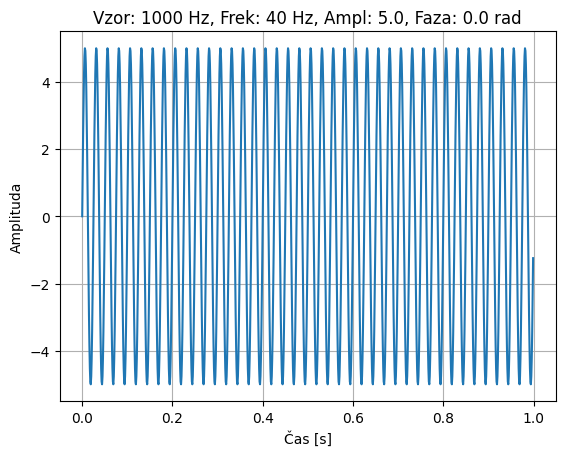

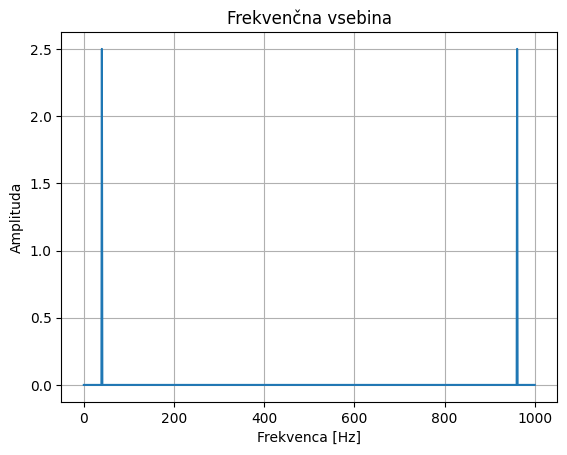

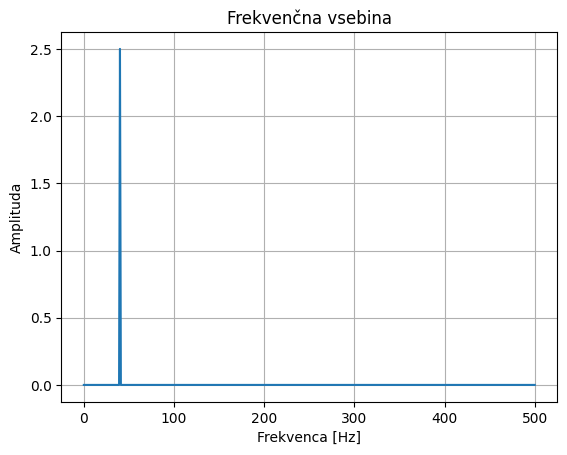

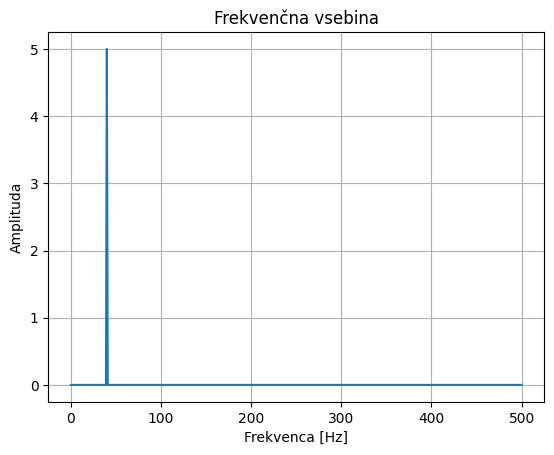

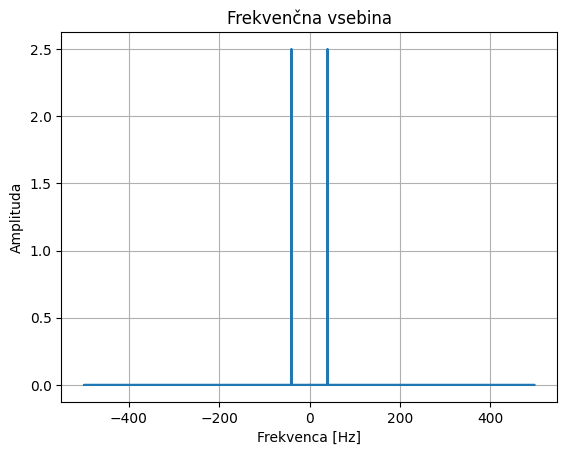

In [58]:
# Po delih podrobneje poglejmo rezultat FFT - Amplitude
Fs = 1000                       # vzorčevalna frekvenca [Hz] - število "točk" na sekundo
T = 1.0                         # dolžina vzorcev - signala [s]
t = np.arange(0, T, (1.0 / Fs)) # točke vzorčenja - časovni vektor
freq = 40                       # frekvenca [Hz]
A = 5.0                         # amplituda
p1 = 0.0                        # faza [rad]
N = len(t)                      # število vzorcev v signalu

# Signal
y = A*np.sin(2*np.pi*freq*t+p)

# Izris
plt.plot(t, y)
plt.title(f'Vzor: {Fs} Hz, Frek: {freq} Hz, Ampl: {A}, Faza: {p} rad')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# FFT
Y = np.fft.fft(y)

# Frekvenčni razdelki za risanje X osi
x = np.linspace(0, Fs, N)

# Narišemo realni del FFT, rišemo magnitudo kompleksnih sinusoid
ampl = abs(Y)

plt.plot(x, ampl/N)
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# Zakaj dobimo dva vrhova (poz./neg. frek.)?

# Ohranimo samo pozitivne frekvence
ampl = abs(Y[:N//2]);          # Amplitude
x = np.linspace(0, Fs/2, N//2) # Frekvenčni razdelki za risanje X osi

plt.plot(x, ampl/N)
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# Zakaj amplitude niso enake izvornim?
ampl = 2*abs(Y[:N//2]); # Amplitude

plt.plot(x, ampl/N)
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# Poglejmo rezultat FFT še malo drugače
# Premaknimo 0 Hz komponento na sredino spektra - samo vizualno
Y = np.fft.fft(y)
ampl = abs(Y)

x = np.fft.fftfreq(len(t), 1/Fs)

plt.plot(x, ampl/N)
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

#### Primer 6

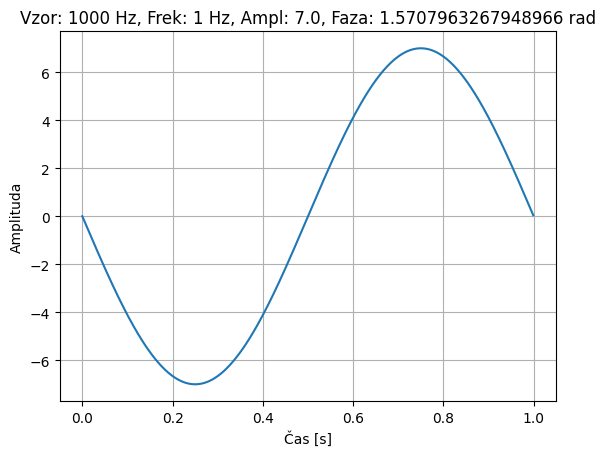

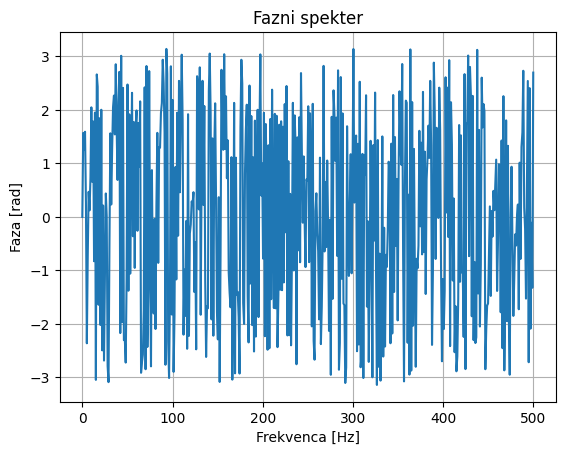

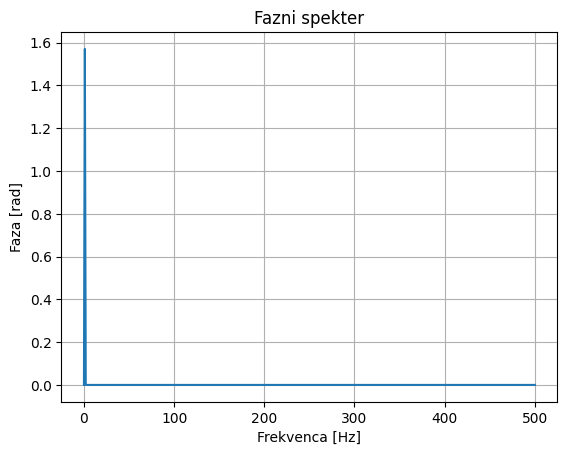

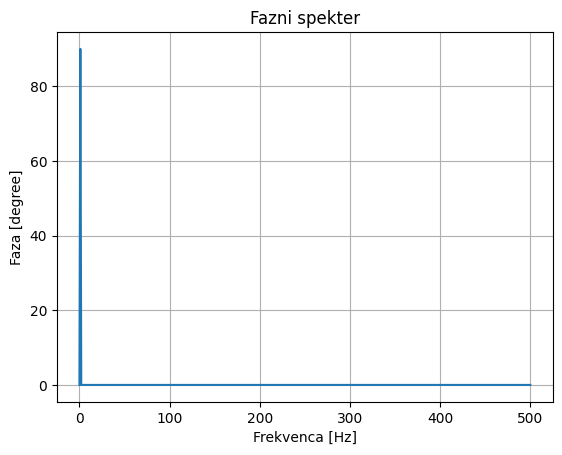

In [59]:
# Faze - zakasnitev signala
Fs = 1000                       # vzorčevalna frekvenca [Hz] - število "točk" na sekundo
T = 1.0                         # dolžina vzorcev - signala [s]
t = np.arange(0, T, (1.0 / Fs)) # točke vzorčenja - časovni vektor
freq = 1                        # frekvenca [Hz]
A = 7.0                         # amplituda
p = np.pi/2                     # faza [rad]
N = len(t)                      # število vzorcev v signalu

# Signal
y = A*np.cos(2*np.pi*freq*t+p)

# Izris
plt.plot(t, y)
plt.title(f'Vzor: {Fs} Hz, Frek: {freq} Hz, Ampl: {A}, Faza: {p} rad')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# FFT
Y = np.fft.fft(y)

# Frekvenčni razdelki za risanje X osi
x = np.linspace(0, Fs/2, N//2)

# Amplitude in Faze
ampl = abs(Y[:N//2])                            # Amplitude
phas = np.arctan2(Y.imag[:N//2], Y.real[:N//2]) # Faze - lahko tudi z np.angle(Y[:N//2])

# Fazni spekter
plt.plot(x, phas)
plt.title(f'Fazni spekter')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Faza [rad]')
plt.grid(True)
plt.show()

# Fazni spekter je zelo šumen zaradi tega, ker so inverzne tangente
# izračunane iz razmerja med imaginarnim na realni del FFT. 
# Vsaka napaka pri zaokroževanju decimalnih števil zelo ojača rezultat 
# in se kaže kot uporabna informacija v faznem spektru.

# Obdržimo le faze pri tistih frekvencah, ki so večje od določenega praga
phas[ampl <= 0.1] = 0

plt.plot(x, phas)
plt.title(f'Fazni spekter')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Faza [rad]')
plt.grid(True)
plt.show()

plt.plot(x, phas/np.pi*180)
plt.title(f'Fazni spekter')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Faza [degree]')
plt.grid(True)
plt.show()

# Faze veljajo za enacbo M*cos(x + theta)
# Če želimo dobiti fazo za sin, uporabimo pi/2+theta

# Faza je izražena v radianih in ima lahko vrednost med -PI in PI
# V kolikor je zakasnitev večja, izgubimo informacijo o tem, saj so koti periodični na 2PI.
# To imenujemo OVIJANJE FAZE. Obstajajo algoritmi, ki predpostavijo, 
# da je faza zvezna in nato poskušajo fazo razviti (RAZVIJANJE FAZE).

#### Primer 7

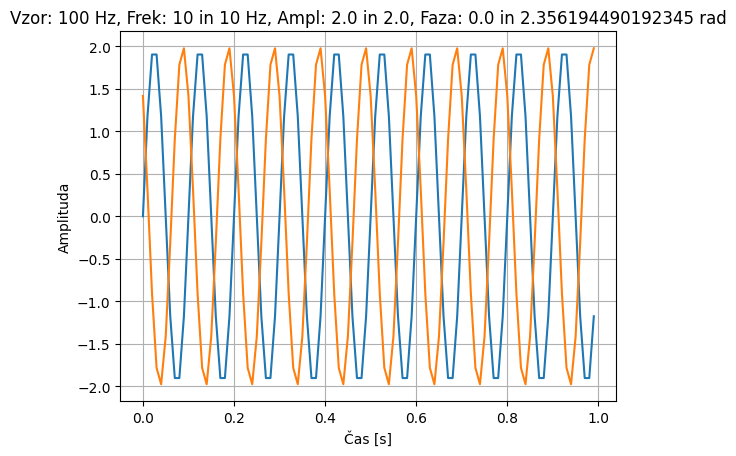

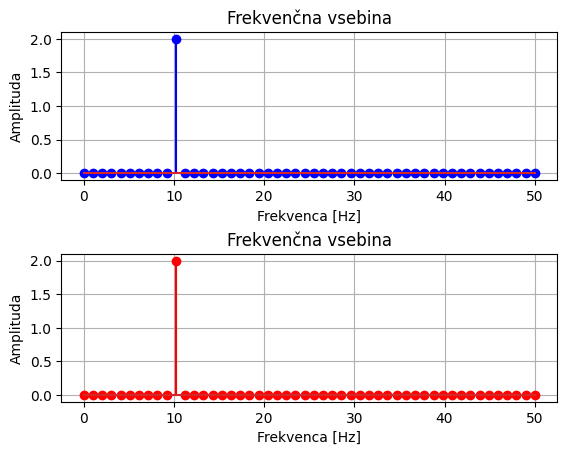

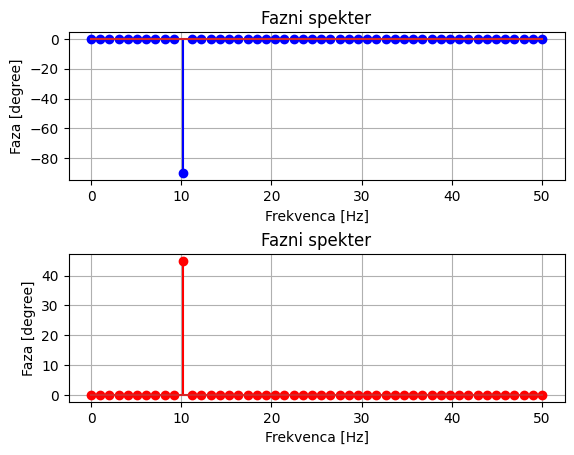

In [ ]:
# Kje pa zdaj vidimo fazo oz. kaj nam faza pove?
Fs = 100                        # vzorčevalna frekvenca [Hz] - število "točk" na sekundo
T = 1.0                         # dolžina vzorcev - signala [s]
t = np.arange(0, T, (1.0 / Fs)) # točke vzorčenja - časovni vektor
freq1 = 10                      # frekvenca 1 [Hz]
freq2 = 10                      # frekvenca 2 [Hz]
A1 = 2.0                        # amplituda 1
A2 = 2.0                        # amplituda 2
p1 = 0.0                        # faza 1 [rad]
p2 = np.pi/2+np.pi/4            # faza 2 [rad]
N = len(t)                      # število vzorcev v signalu

# Signali
y1 = A1*np.cos(2*np.pi*t*freq1+p1)
y2 = A2*np.cos(2*np.pi*t*freq2+p2)

# Izris
plt.plot(t, y1)
plt.plot(t, y2)
plt.title(f'Vzor: {Fs} Hz, Frek: {freq1} in {freq2} Hz, Ampl: {A1} in {A2}, Faza: {p1} in {p2} rad')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# FFT
Y1 = np.fft.fft(y1)
Y2 = np.fft.fft(y2)

# Frekvenčni razdelki za risanje X osi
x = np.linspace(0, Fs/2, N//2)

# Amplitude
ampl1 = 2*abs(Y1[:N//2])
ampl2 = 2*abs(Y2[:N//2])

plt.subplot(2,1,1)
plt.stem(x, ampl1/N, 'b')
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)

plt.subplot(2,1,2)
plt.stem(x, ampl2/N, 'r')
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)

plt.subplots_adjust(hspace=0.5)
plt.show()

# Faze
phas1 = np.arctan2(Y1.imag[:N//2], Y1.real[:N//2])
phas1[ampl1 <= 0.1] = 0
phas2 = np.arctan2(Y2.imag[:N//2], Y2.real[:N//2])
phas2[ampl2 <= 0.1] = 0

plt.subplot(2,1,1)
plt.stem(x, phas1/np.pi*180, 'b')
plt.title(f'Fazni spekter')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Faza [degree]')
plt.grid(True)

plt.subplot(2,1,2)
plt.stem(x, phas2/np.pi*180, 'r')
plt.title(f'Fazni spekter')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Faza [degree]')
plt.grid(True)

plt.subplots_adjust(hspace=0.5)
plt.show()

#### Primer 8

In [ ]:
# Kaj se zgodi, če imamo zraven dveh sinusoid še šum?
Fs = 1000                       # vzorčevalna frekvenca [Hz] - število "točk" na sekundo
T = 1.0                         # dolžina vzorcev - signala [s]
t = np.arange(0, T, (1.0 / Fs)) # točke vzorčenja - časovni vektor
freq1 = 10                      # frekvenca 1 [Hz]
freq2 = 20                      # frekvenca 2 [Hz]
A1 = 0.5                        # amplituda 1
A2 = 1.0                        # amplituda 2
p1 = 0.0                        # faza 1 [rad]
p2 = 0.0                        # faza 2 [rad]
N = len(t)                      # število vzorcev v signalu

# Signali
y1 = A1*np.sin(2*np.pi*t*freq1+p1)
y2 = A2*np.sin(2*np.pi*t*freq2+p2)

# Seštejemo in dodamo šum
ys = y1 + y2 + 2*np.random.randn(len(t))

# Izris
plt.plot(t, ys)
plt.title(f'Vzor: {Fs} Hz, Frek: {freq1} in {freq2} Hz, Ampl: {A1} in {A2}, Faza: {p1} in {p2} rad')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# FFT
Ys = np.fft.fft(ys)

# Frekvenčni razdelki za risanje X osi
x = np.linspace(0, Fs/2, N//2)

# Amplitude
ampl = 2*abs(Ys[:N//2])

plt.plot(x, ampl/N)
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# Kaj delamo s spodnjimi ukazi?
Ys[0:10] = 0
Ys[12:20] = 0
Ys[22:980] = 0
Ys[982:990] = 0
Ys[992:] = 0

# Amplitude
ampl = 2*abs(Ys[:N//2])

plt.plot(x, ampl/N)
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# Inverzni FFT
ysi = np.fft.ifft(Ys).real

plt.plot(t, y1 + y2, 'b')
plt.plot(t, ysi, 'r')
plt.title(f'Vzor: {Fs} Hz, Frek: {freq1} in {freq2} Hz, Ampl: {A1} in {A2}, Faza: {p1} in {p2} rad')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

In [ ]:
# Kako so zgornji signali slišati?
sd.play(ys, Fs)
sd.wait()
 
sd.play(y1 + y2, Fs)
sd.wait()

sd.play(ysi, Fs)
sd.wait()

#### Primer 9

In [ ]:
# Kako lahko odstranimo eno specifično frekvenco iz mešanega signala?
Fs = 1000                       # vzorčevalna frekvenca [Hz] - število "točk" na sekundo
T = 1.0                         # dolžina vzorcev - signala [s]
t = np.arange(0, T, (1.0 / Fs)) # točke vzorčenja - časovni vektor
freq1 = 20                      # frekvenca 1 [Hz]
freq2 = 30                      # frekvenca 2 [Hz]
freq3 = 40                      # frekvenca 3 [Hz]
A = 1.0                         # amplituda
p = 0.0                         # faza [rad]
N = len(t)                      # število vzorcev v signalu

# Signali
y1 = A*np.sin(2*np.pi*t*freq1+p)
y2 = A*np.sin(2*np.pi*t*freq2+p)
y3 = A*np.sin(2*np.pi*t*freq3+p)

# Seštejemo in dodamo šum
ys = y1 + y2 + y3

# Izris
plt.plot(t, ys)
plt.title(f'Vzor: {Fs} Hz, Frek: {freq1}, {freq2} in {freq3} Hz, Ampl: {A}, Faza: {p} rad')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# FFT
Ys = np.fft.fft(ys)

# Frekvenčni razdelki za risanje X osi
x = np.linspace(0, Fs/2, N//2)

# Amplitude
ampl = 2*abs(Ys[:N//2])

plt.plot(x, ampl/N)
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# Kje se nahaja frekvenca freq1
f_bin1 = int(N/Fs*freq1)

# Kjer je frekvenca nastavimo na 0
Ys[f_bin1] = 0
Ys[N-f_bin1+2] = 0

# Inverzni FFT
ysi = np.fft.ifft(Ys).real

plt.plot(t, ys, 'b')
plt.plot(t, ysi, 'r')
plt.title(f'Vzor: {Fs} Hz, Frek: {freq2} in {freq3} Hz, Ampl: {A}, Faza: {p} rad')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

#### Primer 10

In [ ]:
# Spektralno prepuščanje

# FFT pretvori signal iz časovnega v frekvenčni prostor. 
# Kljub temu, da ima signal končno dolžino ga z diskretno Fourierovo transformacijo 
# obravnavamo kot periodičnega in neskončnega.

# Če s FFT pretvorimo signal z dolžino 1024 vzorcev bomo dobili signal v 
# frekvenčnem prostoru razdeljen na 1024 frekvenčnih razdelkov. 
# Vsaka frekvenčna komponenta doda vrednost v posamezen frekvenčni razdelek. 
# Če frekvenčna komponenta ni popolnoma poravnana s sredino frekvenčnega razdelka 
# gre nekaj njene energije (amplitude) tudi v sosednje razdelke. 
# To imenujemo spektralno prepuščanje.

Fs = 100                        # vzorčevalna frekvenca [Hz] - število "točk" na sekundo
T = 2.56                        # dolžina vzorcev - signala [s]
t = np.arange(0, T, (1.0 / Fs)) # točke vzorčenja - časovni vektor
freq = 9.3                      # frekvenca [Hz]
A = 10.0                        # amplituda
p = np.pi/2                     # faza [rad]
N = len(t)                      # število vzorcev v signalu

# Signal
y1 = A*np.sin(2*np.pi*t*freq+p)

# Izris
plt.plot(t, y1)
plt.title(f'Vzor: {Fs} Hz, Frek: {freq} Hz, Ampl: {A}, Faza: {p} rad')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# FFT
Y1 = np.fft.fft(y1)

# Frekvenčni razdelki za risanje X osi
x = np.linspace(0, Fs/2, N//2)

# Amplitude
ampl1 = 2*abs(Y1[:N//2])

# Vidimo spektralno prepuščanje
plt.plot(x, ampl1/N)
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.xlim(5, 15)
plt.grid(True)
plt.show()

# Če frekvenco povišamo za 0.075 Hz na 9.375, se 
# spektralnemu prepuščanju izognimo, saj ta frekvenca pade ravno 
# v sredino frekvenčnega razdelka (100/256*24=9.375). 
# Širino frekvenčnega razdelka izračunamo s formulo Fs/N. 

# Širina frekvenčnih razdelkov
f_bin_spac = Fs/N; 

freq = 9.375 # frekvenca [Hz]

# Signal
y2 = A*np.sin(2*np.pi*t*freq+p)

# FFT
Y2 = np.fft.fft(y2)

# Amplitude
ampl2 = 2*abs(Y2[:N//2])

plt.plot(x, ampl2/N)
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.xlim(5, 15)
plt.grid(True)
plt.show()

plt.stem(x, ampl1/N, 'b')
plt.stem(x, ampl2/N, 'r')
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.xlim(5, 15)
plt.grid(True)
plt.show()

#### Primer 11

In [ ]:
# Spektralnega prepuščanja v realnosti ne moremo izničiti, lahko pa ga poskušamo zmanjšati z uporabo oken. 
# To pomeni, da signal pomnožimo s funkcijo - oknom, ki se ob robovih približuje ničli.
# Primer okna je npr. Hammingovo okno

Fs = 100                        # vzorčevalna frekvenca [Hz] - število "točk" na sekundo
T = 2.56                        # dolžina vzorcev - signala [s]
t = np.arange(0, T, (1.0 / Fs)) # točke vzorčenja - časovni vektor
freq = 9.3                      # frekvenca [Hz]
A = 10.0                        # amplituda
p = np.pi/2                     # faza [rad]
N = len(t)                      # število vzorcev v signalu

# Signal
y = A*np.sin(2*np.pi*t*freq+p)

# Ustvarimo okno z dolžino N
w = np.hamming(N)

# Signal pomnožimo z oknom
y = y * w

# Izris
plt.plot(t, y)
plt.title(f'Vzor: {Fs} Hz, Frek: {freq} Hz, Ampl: {A}, Faza: {p} rad')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# FFT
Y = np.fft.fft(y)

# Frekvenčni razdelki za risanje X osi
x = np.linspace(0, Fs/2, N//2)

# Amplituda
ampl = 2*abs(Y[:N//2])

plt.plot(x, ampl1/N, 'b')
plt.plot(x, ampl2/N, 'r')
plt.plot(x, ampl/N, 'y')
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.xlim(5, 15)
plt.grid(True)
plt.show()

# Vidimo, da smo z oknom zmanjšali spektralno prepuščanje, vendar smo z oknom zmanjšali skupno energijo sistema! 
# Zavedati se moramo, da z oknom signal spremenimo, torej ne gledamo več originalnega signala.

#### Primer 12

In [ ]:
# Računanje DFT s pomočjo skalarnega produkta
Fs = 1000                       # vzorčevalna frekvenca [Hz] - število "točk" na sekundo
T = 1.0                         # dolžina vzorcev - signala [s]
t = np.arange(0, T, (1.0 / Fs)) # točke vzorčenja - časovni vektor
freq1 = 16                      # frekvenca 1 [Hz]
freq2 = 6                       # frekvenca 2 [Hz]
A = 5.0                         # amplituda
p = 0.0                         # faza [rad]

# Signali
y1 = A*np.sin(2*np.pi*t*freq1+p)
y2 = A*np.sin(2*np.pi*t*freq2+p)

# Generiramo signal sestavljen iz dveh prej generiranih signalov
ys = y1 + y2

# Izris
plt.plot(t, ys)
plt.title(f'Vzor: {Fs} Hz, Frek: {freq1} in {freq2} Hz, Ampl: {A}, Faza: {p} rad')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# Dekompozicijo s skalarnim produktom z uporabo Eulerjeve enačbe zapišemo
N = len(ys);     # dolžina signala 
n = np.arange(N) # indeksi od 0 do N
k = 6;           # iskana frekvenca

# Kompleksen rezultat
Ys = np.zeros(Fs, dtype=complex)

# Rezultat dekompozicije je kompleksno število iz katerega lahko izračunamo amplitudo ter fazo za iskano frekvenco
Ys[k] = np.sum(ys*np.exp(-2j*np.pi*k*n/N))

# Frekvenčni razdelki za risanje X osi
x = np.linspace(0, Fs/2, N//2)

# Amplitude
ampl = 2*abs(Ys[:N//2])

plt.plot(ampl/N)
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

plt.plot(ampl/N)
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.xlim(1, 30)
plt.grid(True)
plt.show()

#### Primer 13

In [ ]:
# Analiza posnetega zvoka
Fs = 44100                         # vzorčevalna frekvenca [Hz] - število "točk" na sekundo
T = 5.0                            # dolžina snemanja signala [s]
ADbits = 'int16';                  # resolucija [bit]
chans = 1                          # število kanalov - 1 - mono; 2 - stereo

# Zajem zvoka
print("Snemanje...")
y = sd.rec(int(Fs * T), samplerate=Fs, channels=chans, dtype=ADbits)
sd.wait()
print("Končano")

In [ ]:
# Predvajamo zvok
print("Predvajanje...")
sd.play(y, Fs)
sd.wait()
print("Končano")

In [ ]:
# Narišemo posnetek (samo prvi kanal)
plt.plot(np.arange(y.shape[0]) / Fs, y)
plt.title("Zvočni posnetek")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.show()

# Vzamemo samo odsek signala
start = 1;  # začetek odsteka za DFT [s]
length = 1; # dolžina odsteka za DFT [s]

y2 = y[Fs*start:(start+length)*Fs,0] # odsek signala
N = len(y2)                          # število vzorcev v signalu

# FFT
Y2 = np.fft.fft(y2)

# Amplitude
ampl = 2*abs(Y2[:N//2])

plt.plot(ampl/N)
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

plt.plot(ampl/N)
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.xlim(1, 1500)
plt.grid(True)
plt.show()

In [ ]:
# Energija po frekvencah
E = Y2[:N//2]*np.conj(Y2[:N//2])
Et = sum(E)
E = (E*100)/Et
Ei = np.where(E >= 1)[0]

plt.plot(ampl/N)
plt.scatter(Ei, ampl[Ei]/N, facecolors='none', edgecolors='r')
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.xlim(1, 1500)
plt.grid(True)
plt.show()